In [28]:
#importing packages
#gradient boosting
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [29]:
#importing data sets
trainData= pd.read_csv("C:/Users/patsh/Downloads/QSARtrain.csv")
testData= pd.read_csv("C:/Users/patsh/Downloads/QSARtest.csv")
testData.head()

,nHM,piPC09,PCD,X2Av,MLOGP,ON1V,N-072,B02[C-N],F04[C-O],Class,...,numRings,numDbonds,numTbonds,numHalo,numSulf,numP,numSi,numSn,MW,logBCF
0,0,0.000,1.40,0.18,2.85,0.86,0,0,0,3,...,1,1,0,0,0,0,0,0,104.062600,1.13
1,0,5.768,2.21,0.18,3.40,1.47,0,0,1,3,...,2,0,0,0,0,0,0,0,184.088815,1.40
2,0,5.614,2.21,0.16,3.40,1.31,0,0,2,1,...,2,0,0,0,0,0,0,0,170.073165,2.57
3,0,5.030,2.07,0.16,3.09,1.54,0,1,0,2,...,2,1,0,0,0,0,0,0,211.110947,1.05
4,0,0.000,0.00,0.28,1.00,1.80,0,1,1,1,...,1,0,0,0,0,0,0,0,143.131014,0.23


In [30]:
#separating inputs and outputs for test train data
xtrain=trainData.drop('logBCF',axis=1)
ytrain=trainData['logBCF']
xtest=testData.drop('logBCF',axis=1)
ytest=testData['logBCF']

In [31]:
#training model with training data
reg = GradientBoostingRegressor( n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0, loss='ls' )
ypred=reg.fit(xtrain, ytrain).predict(xtest)
print("Mean squared error: %.2f" %mean_squared_error(ytest,ypred))
print("Coefficient of determination: %.2f" %r2_score(ytest,ypred))
print("RMSE: %.2f:" %mean_squared_error(ytest,ypred)**0.5)

Mean squared error: 0.42
Coefficient of determination: 0.78
RMSE: 0.65:


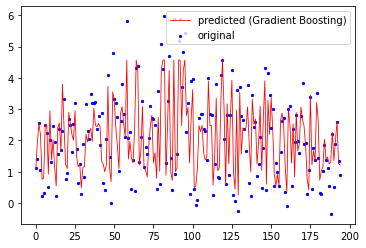

In [37]:
x_ax = range(len(xtest))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted (Gradient Boosting)")
plt.legend()
plt.show()